### name : Omkar Thawakar
#### Reg No : 2015BCS003  __ ____Roll_No : A-08 _____ Batch: A-01 
#### Aim : Implement Fuzzy Min Max Neural Network for clustering

In [114]:
import numpy as np
import pandas as pd

In [115]:
class FuzzyMinMaxNN:
    
    def __init__(self,sensitivity,theta=0.4):
        self.gamma = sensitivity
        self.clasess = None
        self.V = []
        self.W = []
        self.theta = theta
        self.confusion_matrix = None
    
    
    def func(self,x,gamma):
        if x*gamma>1:
            return 1
        elif 0<=x*gamma<=1 :
            return x*gamma
        else:
            return 0

    def fuzzy_membership(self,ah,v,w,gamma=1):
        """
            returns the fuzzy menbership function :
            b_i(xh,v,w) = 1/2n*(------)
        """
        return sum([(1-self.func(ah[i]-w[i],gamma)-self.func(v[i]-ah[i],gamma)) for i in range(len(ah))])/len(ah)
    
    def get_hyperbox(self,x):
        
        """
            If no hyperbox present initially so create new
        """
        if len(self.V)==0 and len(self.W)==0 :
            self.V.append(x)
            self.W.append(x)
            expand = False
            return len(self.V)-1 , expand 
                
        """
            returns the most sutaible hyperbox for input pattern x
            otherwise None
        """
        mylist = []
        for i in range(len(self.V)):
            mylist.append(self.fuzzy_membership(x,self.V[i],self.W[i]))
        
        if len(mylist)>0:
            for box in sorted(mylist)[::-1]:
                i = mylist.index(box)

                n_theta = sum([(max(self.W[i][_],x[_]) - min(self.V[i][_],x[_])) for _ in range(len(x))])
                
                if len(x)*self.theta >= n_theta :
                    expand = True
                    return i,expand
            '''
                No hyperbox follow expansion criteria so create new
            '''
            self.V.append(x)
            self.W.append(x)
            expand = False
            return len(self.V)-1 , expand
            
        else:
            """
                If no hyperbox present for pattern x of class d so create new 
            """
            self.V.append(x)
            self.W.append(x)
            expand = False
            return len(self.V)-1,expand
    
    def expand(self,x,key):
        self.V[key] = [min(self.V[key][i],x[i]) for i in range(len(x))]
        self.W[key] = [max(self.W[key][i],x[i]) for i in range(len(x))]
        
    
    def overlap_Test(self):
        del_old = 1
        del_new = 1
        box_1,box_2,delta = -1,-1,-1
        for j in range(len(self.V)):
            for k in range(j+1,len(self.V)):
                
                for i in range(len(self.V[j])):
                    
                    """
                        Test Four cases given by Patrick Simpson
                    """
                    
                    if (self.V[j][i] < self.V[k][i] < self.W[j][i] < self.W[k][i]) :
                        self.V[k][i] = self.W[j][i] = (self.V[k][i]+self.W[j][i])/2
                        
                    elif (self.V[k][i] < self.V[j][i] < self.W[k][i] < self.W[j][i]) :
                        self.V[j][i] = self.W[k][i] = (self.V[j][i]+self.W[k][i])/2
                        
                    elif (self.V[j][i] < self.V[k][i] <= self.W[k][i] < self.W[j][i]) :
                        if (self.W[k][i]-self.V[j][i])<(self.W[j][i]-self.V[k][i]) :
                            self.V[j][i] = self.W[k][i]
                        else:
                            self.W[j][i] = self.V[k][i]
                    elif (self.V[k][i] < self.V[j][i] < self.W[j][i] < self.W[k][i]) :
                        if (self.W[k][i]-self.V[j][i])<(self.W[j][i]-self.V[k][i]):
                            self.W[k][i] = self.V[j][i]
                        else:
                            self.V[k][i] = self.W[j][i]
                           
    
    def predict(self,x):
        mylist = []
        for i in range(len(self.V)):
            mylist.append([self.fuzzy_membership(x,self.V[i],self.W[i])])
            
        for i in range(len(mylist)):
            print('pattern {} belongs to cluster {} with fuzzy membership value : {}'.format(x,i+1,mylist[i]))
        
            
                    
    def train(self,X,epochs):
        for _ in range(epochs):
            print('epoch : {}'.format(_+1))
            print('='*50)

            for x in X:
                '''Get most sutaible hyperbox!!'''
                print('input pattern : ',x )
                
                i , expand = self.get_hyperbox(x)
                
                #print('Hyperbox : {} , {} '.format(self.V[i],self.W[i])  )

                if expand:
                    self.expand(x,i)
                    print("Expanded Hyperbox : ",self.V[i] , self.W[i])
                    self.overlap_Test()
                    print("Hyperboxes : ")
                    print(self.V)
                    print(self.W)
                    
                print('='*70)
            
        print('final hyperbox : ')
        print('V : ',self.V)
        print('W : ',self.W)
        


In [116]:
fuzzy = FuzzyMinMaxNN(1,theta=0.4)    

## Dataset

In [117]:
X = [[0.2,0.2],[0.6,0.6],[0.7,0.7],[0.4,0.7],[0.7,0.4]]

In [118]:
fuzzy.train(X,1)

epoch : 1
input pattern :  [0.2, 0.2]
input pattern :  [0.6, 0.6]
Expanded Hyperbox :  [0.2, 0.2] [0.6, 0.6]
Hyperboxes : 
[[0.2, 0.2]]
[[0.6, 0.6]]
input pattern :  [0.7, 0.7]
input pattern :  [0.4, 0.7]
Expanded Hyperbox :  [0.4, 0.7] [0.7, 0.7]
Hyperboxes : 
[[0.2, 0.2], [0.5, 0.7]]
[[0.5, 0.6], [0.7, 0.7]]
input pattern :  [0.7, 0.4]
Expanded Hyperbox :  [0.5, 0.4] [0.7, 0.7]
Hyperboxes : 
[[0.2, 0.2], [0.5, 0.5]]
[[0.5, 0.5], [0.7, 0.7]]
final hyperbox : 
V :  [[0.2, 0.2], [0.5, 0.5]]
W :  [[0.5, 0.5], [0.7, 0.7]]


### Testing of pattern 

In [119]:
for x in X:
    fuzzy.predict(x)
    print('='*80)

pattern [0.2, 0.2] belongs to cluster 1 with fuzzy membership value : [1.0]
pattern [0.2, 0.2] belongs to cluster 2 with fuzzy membership value : [0.7]
pattern [0.6, 0.6] belongs to cluster 1 with fuzzy membership value : [0.9]
pattern [0.6, 0.6] belongs to cluster 2 with fuzzy membership value : [1.0]
pattern [0.7, 0.7] belongs to cluster 1 with fuzzy membership value : [0.8]
pattern [0.7, 0.7] belongs to cluster 2 with fuzzy membership value : [1.0]
pattern [0.4, 0.7] belongs to cluster 1 with fuzzy membership value : [0.9]
pattern [0.4, 0.7] belongs to cluster 2 with fuzzy membership value : [0.95]
pattern [0.7, 0.4] belongs to cluster 1 with fuzzy membership value : [0.9]
pattern [0.7, 0.4] belongs to cluster 2 with fuzzy membership value : [0.95]


### Visualization of HyperBoxes

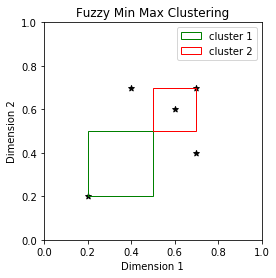

In [122]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_box(ax,a,b,label,color):
    width = abs(a[0] - b[0])
    height = abs(a[1] - b[1])
    ax.add_patch(patches.Rectangle(a, width, height, fill=False,edgecolor=color))

"""
    plot dataset
"""
fig1 = plt.figure()
ax = fig1.add_subplot(111, aspect='equal',alpha=0.7)

        
"""
    plot Hyperboxes
"""
colors = ['g','r','cyan','k','yellow']

for i in range(len(fuzzy.V)):
    draw_box(ax,fuzzy.V[i],fuzzy.W[i],i+1,color=colors[i])

    
for i in range(len(X)):
    ax.scatter(X[i][0],X[i][1] , marker='*', c='k')

    
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Fuzzy Min Max Clustering')
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend(('cluster 1','cluster 2'))
plt.show()